# Galaxies, mergers and groups

In this notebook we use Galaxy Zoo 1 (GZ2) data which has been matched to group data from Yang to investigate the relations between mergers and groups.

The GZ1 data can be found at https://data.galaxyzoo.org/
<br>
Information on Data Release 7 of the Sloan Digital Sky Survery (SDSS) can be found at https://classic.sdss.org/dr7/
<br>
The Yang group data can be found at https://gax.sjtu.edu.cn/data/Group.html

We are using GZ1 "Table 2" in this notebook, which has 667,944 galaxies in the data set.
<br>
We use Yang Catalogue "PetroC" containing 639,359 galaxies and 473,872 groups.

We have matched the GZ1 data to the Yang data by right-ascension (ra) and declination (dec) with a maximum error in position of 5 arcsec. This gives us a total of 586,594 galaxies with group data.

From now on we shall refer to the Yang group data set of 639,359 galaxies as Yang, and the matched GZ1 and Yang data sets of 586,594 galaxies as GZ1.

### Importing the data
First we import the necessary packages and import the GZ1 matched data into an Astropy Table "gz1_data" and the group data into "group_data".

We display the head of each table to get an idea of what the data looks like.

In [1]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import .fits data as a table
gz1_filename = "Data\GZ1_with_group_data_5_arcsec.fits" # GZ2 galaxies that have been matched to group data set
groups_filename = "Data\galaxy_group_data_C_with_size.fits" # All galaxies in group data set

with fits.open(gz1_filename) as data:
    gz1_data = Table(data[1].data)

with fits.open(groups_filename) as data:
    group_data = Table(data[1].data)

# Display head of data
display(gz1_data[0:5])
display(group_data[0:5])

OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN,galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size,Separation
int64,str11,str11,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64,float64
587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.0,0.167,0.222,0.0,0.0,0.389,0.203,0.797,1,0,0,83093,359525,0.003086928,-9.222290512,0.1338061,17.114666,17.7200012,0.8831169,-20.9682369,0.5702841,-20.9466705,0.6748354,1,83093,359525,29185,2,2,29185,359525,83093,29185,0.01281632,-9.22000336,0.13411463,10.682,11.0124,13.1365,13.0034,14.631,13.1362,1.0,1,1,9168,2,2,0.04758951551318924
587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.0,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0,163188,726721,0.005763033,15.509795895,0.1750241,16.6725159,17.7200012,0.8288288,-22.1664047,0.9858291,-22.2596455,1.0175407,1,163188,726721,172897,1,1,172897,726721,163188,172897,0.00576303,15.50979589,0.1750241,11.0019,11.4557,13.612,13.6233,22.3009,22.5473,1.0,1,1,-2147483648,1,1,0.057039240892335724
587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.0,0.0,0.22,0.068,0.0,0.22,0.64,0.29,0,0,1,171433,785675,0.006457952,-0.092600781,0.0781329,16.9845467,17.6200008,1.0,-19.995575,0.8954732,-19.9444752,0.9110429,1,171433,785675,178092,1,1,178092,785675,171433,178092,0.00645795,-0.09260078,0.0781329,10.0995,10.4986,12.1537,12.2215,6.9717,7.316,0.635,1,1,-2147483648,1,1,0.06282660001525803
587727180060098638,00:00:01.57,-09:29:40.3,28,0.857,0.0,0.036,0.0,0.107,0.0,0.036,0.83,0.06,0,0,1,73987,332056,0.006541694,-9.494524216,0.1904697,17.4859962,17.7200012,0.8831169,-21.5643215,1.0032854,-21.6046448,1.002326,1,73987,332056,115947,1,1,115947,332056,73987,115947,0.00654169,-9.49452422,0.1904697,10.6639,11.18,13.1058,13.2553,14.268,16.1637,1.0,-1,-1,-2147483648,1,1,0.012822767276773476
587731187277627676,00:00:01.86,+00:43:09.3,38,0.5,0.0,0.053,0.289,0.105,0.053,0.342,0.351,0.473,0,0,1,171923,791409,0.007723978,0.719254487,0.082067,17.3052273,17.6200008,1.0,-19.7800903,0.9558585,-19.797905,0.9352306,1,171923,791409,958,2,2,958,791409,171923,958,359.96490562,0.69005505,0.08151695,11.543,11.9855,14.2439,14.2322,45.277,44.5952,0.95,1,1,18479,18,18,0.09505438188164982


galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,67926,1,1,67926,750,1,67926,38.04913268,0.22402609,0.0540216,9.9868,10.4001,11.9938,12.0956,6.2305,6.6916,1.0,1,1,-2147483648,1,1
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,23485,2,2,23485,751,2,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,23485,1,1,23485,752,3,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,67927,1,1,67927,994,4,67927,54.45034082,0.57260624,0.1385037,10.1958,10.5868,12.3102,12.346,7.7948,7.9976,1.0,-1,-1,-2147483648,1,1
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,67928,1,1,67928,1010,5,67928,54.53488061,0.57861477,0.1289553,10.2077,10.6528,12.3289,12.4436,7.9008,8.5825,1.0,1,-1,-2147483648,1,1


### Spread of group size
We would like to see what the spread of group size is, both for Yang and GZ1. We plot historgrams of group size for both data sets.

We should expect similar spreads for both data sets, as GZ1 is a subset of the Yang data.

The histograms are plotted on a log-log scale, with logarithmic bin sizes.

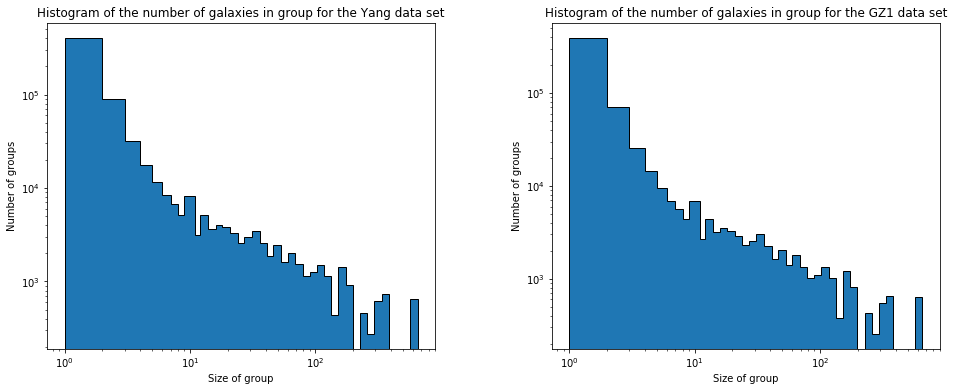

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Create logarithmically spaced bins for logarithmic histogram plot
bin_start = np.log10(min(group_data["group_size"]))
bin_end = np.log10(max(group_data["group_size"]))
num_of_bins = 50
log_bins = np.logspace(bin_start, bin_end, num_of_bins)
log_bins = np.around(log_bins)
log_bins = np.unique(log_bins)

# Plot histogram of group size for Yang data
ax[0].hist(group_data["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of groups")
ax[0].set_title("Histogram of the number of galaxies in group for the Yang data set")

# Plot histogram of group size for GZ2 data
ax[1].hist(gz1_data["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Number of groups")
ax[1].set_title("Histogram of the number of galaxies in group for the GZ1 data set")

fig.subplots_adjust(wspace=0.3)

plt.show()

Both sets of data follow the same trends and look similar, as expected. We can see that most groups are small in size, as there is a large peak near 1. To get an idea of the number of groups of each group size, we will count the number of unique groups at each size and create a table of this data.
<br>
We do this for both Yang and GZ1.

In [3]:
# Create pandas dataframes to allow us to use pandas' groupby function
group_data_pandas = group_data.to_pandas()
gz1_data_pandas = gz1_data.to_pandas()

# Group data by group size, then count then unique number of groups and count the number of unique groups
group_data_group_counts = group_data_pandas.groupby("group_size")["group id"].unique().apply(lambda x: len(x))
gz1_data_group_counts = gz1_data_pandas.groupby("group_size")["group id"].unique().apply(lambda x: len(x))

# Create a dataframe and size column, easier to work with
group_data_group_counts = pd.DataFrame(group_data_group_counts)
group_data_group_counts.columns = ["Number of Groups"]
group_data_group_counts["size"] = group_data_group_counts.index

# Create a dataframe and size column, easier to work with
gz1_data_group_counts = pd.DataFrame(gz1_data_group_counts)
gz1_data_group_counts.columns = ["Number of Groups"]
gz1_data_group_counts["size"] = gz1_data_group_counts.index

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
group_data_group_counts_df = pd.DataFrame()
group_data_group_counts_df.loc[0, "groups"] = sum(group_data_group_counts["Number of Groups"])
group_data_group_counts_df.loc[0, "groups N=1"] = group_data_group_counts[group_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=2"] = group_data_group_counts[group_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=3"] = group_data_group_counts[group_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=4"] = group_data_group_counts[group_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=5"] = group_data_group_counts[group_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N>5"] = sum(group_data_group_counts[group_data_group_counts["size"] > 5]["Number of Groups"])
group_data_group_counts_df = group_data_group_counts_df.astype(int)

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
gz1_data_group_counts_df = pd.DataFrame()
gz1_data_group_counts_df.loc[0, "groups"] = sum(gz1_data_group_counts["Number of Groups"])
gz1_data_group_counts_df.loc[0, "groups N=1"] = gz1_data_group_counts[gz1_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
gz1_data_group_counts_df.loc[0, "groups N=2"] = gz1_data_group_counts[gz1_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
gz1_data_group_counts_df.loc[0, "groups N=3"] = gz1_data_group_counts[gz1_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
gz1_data_group_counts_df.loc[0, "groups N=4"] = gz1_data_group_counts[gz1_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
gz1_data_group_counts_df.loc[0, "groups N=5"] = gz1_data_group_counts[gz1_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
gz1_data_group_counts_df.loc[0, "groups N>5"] = sum(gz1_data_group_counts[gz1_data_group_counts["size"] > 5]["Number of Groups"])
gz1_data_group_counts_df = gz1_data_group_counts_df.astype(int)

# Create table of fraction of groups represented
group_representation = gz1_data_group_counts_df / group_data_group_counts_df

# Display tables
display(group_data_group_counts_df.style.set_caption("Yang group data:"))
display(gz1_data_group_counts_df.style.set_caption("GZ1 group data:"))
display(group_representation.style.set_caption("Fraction of Yang groups with at least 1 galaxy in GZ2:"))

,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,473872,405947,44441,10721,4388,2329,6046


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,461977,394985,43702,10595,4356,2314,6025


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,0.974898,0.972996,0.983371,0.988247,0.992707,0.993559,0.996527


As the plots suggested, most of the galaxies are in groups of only 1, with only very few groups of size > 5.

The fraction of groups in Yang that are also at least partially represented in GZ1 is very high, around 97.5% of groups in Yang are also in GZ1. This increases to almost 100% for groups of size $N > 5$, which we would expect (the more galaxies in a group the more likely it is at least 1 is also in GZ1).

### Missing galaxies and group completeness
As the number of galaxies in GZ1 is smaller than the number in Yang, we expect that some groups will have missing galaxies; there will only be GZ1 data for a subset of the galaxies in the group.

We would like to know how complete the GZ1 data is for each group in GZ1, so we group the galaxies by their group id, and create a new column that gives the number of galaxies in each group that are also in the GZ1 data. The GZ1 data already contains a column giving the number of galaxies in the group from Yang, so we can compare the number of galaxies represented in GZ1 to the total number of galaxies in the group, allowing us to see how many galaxies we are missing.

Here we add columns to the GZ1 data giving the number of GZ1 galaxies in each group, the number of galaxies missing in each group, and the group completeness, which is the fraction of galaxies in each group also in GZ1.

In [6]:
# Create a pandas dataframe to allow us to use pandas' groupby function
gz1_data_pandas = gz1_data.to_pandas()

# Group galaxies by their group_id and create a new column with the number of galaxies in each group in the data set
gz1_data_pandas["GZ1_galaxies_in_group"] = gz1_data_pandas.groupby("group id")["group id"].transform("size")

# Create a new column with the number of galaxies missing from each group in the data set
gz1_data_pandas["galaxies_missing"] = gz1_data_pandas["group_size"] - gz1_data_pandas["GZ1_galaxies_in_group"]

# Create a new column with the fractional completeness of the group
gz1_data_pandas["group_completeness"] = gz1_data_pandas["GZ1_galaxies_in_group"] / gz1_data_pandas["group_size"]

# Turn the dataframe back into an astropy table and display the new columns
gz1_data = Table.from_pandas(gz1_data_pandas)
gz1_data[["group id", "group_size", "GZ1_galaxies_in_group", "galaxies_missing", "group_completeness"]][0:5]

group id,group_size,GZ1_galaxies_in_group,galaxies_missing,group_completeness
int32,int64,int64,int64,float64
29185,2,2,0,1.0
172897,1,1,0,1.0
178092,1,1,0,1.0
115947,1,1,0,1.0
958,18,14,4,0.7777777777777778


An example of the new columns we have created are shown above with the head of the data.

To see how the group completeness is spread, we create a scatter plot of group completeness against group size.

Average completeness of groups N>=5: 0.846
Average completeness of groups N>=10: 0.865
Average completeness of groups N>=30: 0.874


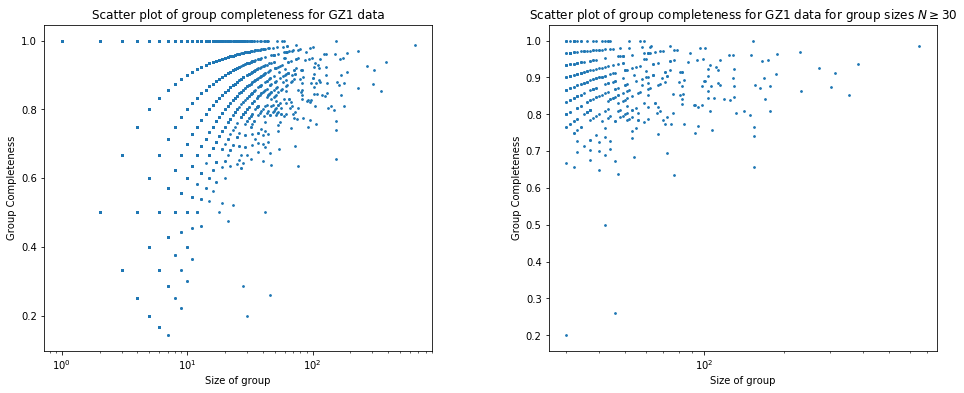

In [7]:
# Create a pandas dataframe and group data by size of groups,
# calculating the average completeness for groups greater than a cetain size
gz1_data_pandas = gz1_data.to_pandas()
groups_unique = gz1_data_pandas.drop_duplicates(subset=["group id"], keep="first")  # Only keep 1 row for each group
groups_5_completeness = groups_unique[groups_unique["group_size"] >= 5]["group_completeness"].mean()
groups_10_completeness = groups_unique[groups_unique["group_size"] >= 10]["group_completeness"].mean()
groups_30_completeness = groups_unique[groups_unique["group_size"] >= 30]["group_completeness"].mean()
print("Average completeness of groups N>=5: " + str(np.round(groups_5_completeness, decimals=3)))
print("Average completeness of groups N>=10: " + str(np.round(groups_10_completeness, decimals=3)))
print("Average completeness of groups N>=30: " + str(np.round(groups_30_completeness, decimals=3)))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(groups_unique["group_size"], groups_unique["group_completeness"], s=3)
ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Group Completeness")
ax[0].set_title("Scatter plot of group completeness for GZ1 data")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
groups_unique_30 = groups_unique[groups_unique["group_size"] >= 30]
ax[1].scatter(groups_unique_30["group_size"], groups_unique_30["group_completeness"], s=3)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Group Completeness")
ax[1].set_title("Scatter plot of group completeness for GZ1 data for group sizes $N \geq 30$")

fig.subplots_adjust(wspace=0.3)

plt.show()

On average, groups with $N \geq 10$ have an average group completeness of 0.865, and groups with $N \geq 30$ have an average group completeness of 0.874.

For small group sizes there are some groups which have a low group completeness (as missing 1 galaxy from the group significantly reduces the completeness). As can be seen in the scond plot, all but 3 groups have a completeness of greater than 0.6, with most being in the range 0.8 to 1.

The high group completeness for means that we can be confident we are sampling a good amount of data to draw conclusions from our analysis of groups using GZ1.

### Megers and groups
Now we have seen how the group data is spread, we would like to know how mergers and group properties are related. We will use the threshold for merger classification as described in [Darg et al. (2009)](https://arxiv.org/pdf/0903.4937.pdf):
- merger weighted vote fraction $p_m$ > 0.4

With galaxies passing this criteria classified as mergers, we will plot how they are spread with group size, as we have done previously for Yang and the entire GZ1 data. We also plot a scatter plot of group size against the weighted merger vote fraction $f_m$.

Number of mergers: 9665


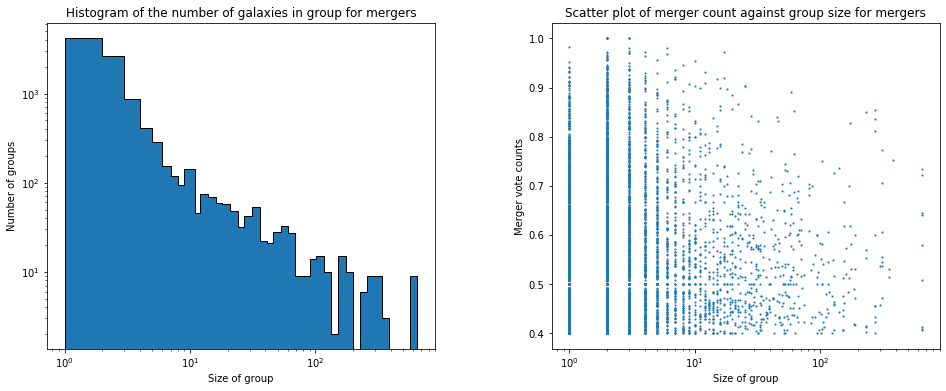

In [11]:
# Create a new column in the data, with a value of 1 if the galaxy is classified as a merger, and 0 if not
gz1_data_pandas = gz1_data.to_pandas()
gz1_data_pandas.loc[gz1_data["P_MG"] > 0.4, "merger_yes"] = 1
gz1_data_pandas["merger_yes"].fillna(0, inplace=True)
gz1_data = Table.from_pandas(gz1_data_pandas)

# New table of only the galaxies classified as mergers
mergers = gz1_data[gz1_data["merger_yes"] == 1]
print("Number of mergers: "+ str(len(mergers)))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot histogram of group size for galaxies classified as mergers
ax[0].hist(mergers["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of groups")
ax[0].set_title("Histogram of the number of galaxies in group for mergers")

# Plot scatter plot of merger vote fraction against group size, for galaxies classified as mergers
ax[1].scatter(mergers["group_size"], mergers["P_MG"], s=1.2)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Merger vote counts")
ax[1].set_title("Scatter plot of merger count against group size for mergers")

fig.subplots_adjust(wspace=0.3)

plt.show()

We see roughly the same spread of group size for the merger data as we have done previously for Yang and GZ1. We do not expect the exact same spread as we have a prior belief that the fraction of mergers is correlated with group size in some way. We will later investigate the merger fraction (the fraction of galaxies that are merging) as a function of group size to see how group size affects the likelihood of a galaxy being a merger.

The merger vote fraction seems to be randomly spread in group size.

### The merger fraction and group size
Now we have an idea of what the group data and merger data looks like, we will investigate how the merger fraction $f_m$ (the fraction of galaxies that are undergoing mergers) changes with group size.

Our hypothesis is that at low group sizes the merger fraction will be small, as it is unlikely that, for example, in a group size of 2 that the galaxies are merging. We also expect that for large group sizes the merger fraction will be small, as the energy in larger groups is much higher, meaning the galaxies have greater velocities and therefore will be more likely to fly-by other galaxiess rather than become gravitationally bound and merge, unless it is a head on collision.

To calculate the merger fraction for a given group size, we will first count the number of galaxies of a certain group size, then count the number of these that are classified as mergers. The merger fraction will be the fraction of the total number of galaxies that are classified as mergers.

In [13]:
gz1_data_pandas = gz1_data.to_pandas()
group_sizes_unique = np.sort(gz1_data_pandas["group_size"].unique())

merger_fraction_group = np.zeros((len(group_sizes_unique), 2))
i=0
for x in group_sizes_unique:
    galaxies_of_group_size = gz1_data_pandas[gz1_data_pandas["group_size"] == x]
    merger_fraction_group[i, 0] = x
    merger_fraction_group[i, 1] = sum(galaxies_of_group_size["merger_yes"] == 1) / len(galaxies_of_group_size)
    i += 1

merger_fraction_group_big = merger_fraction_group[merger_fraction_group[:, 0] >= 10]

Now we have calculated the merger fraction for each group size, we create a scatter plot of merger fraction against group size. We create two plots, one with all group sizes, and one with only group sizes $N \geq 10$.

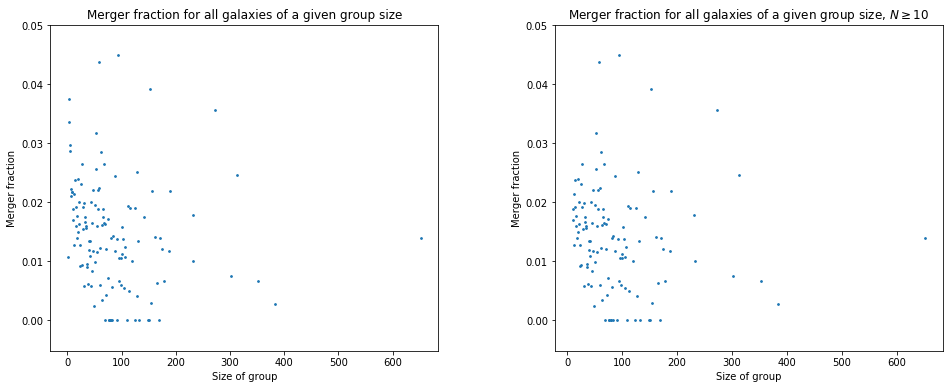

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(merger_fraction_group[:,0], merger_fraction_group[:,1], s=3)
# ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Merger fraction")
ax[0].set_title("Merger fraction for all galaxies of a given group size")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
ax[1].scatter(merger_fraction_group_big[:,0], merger_fraction_group_big[:,1], s=3)
# ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Merger fraction")
ax[1].set_title("Merger fraction for all galaxies of a given group size, $N \geq 10$")

fig.subplots_adjust(wspace=0.3)

plt.show()

We plot the same graphs again, but with a logarithmic scale on the x axis.

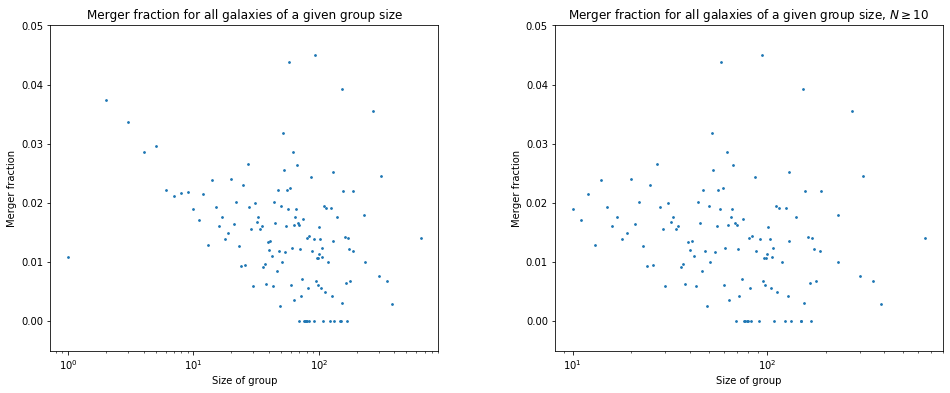

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(merger_fraction_group[:,0], merger_fraction_group[:,1], s=3)
ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Merger fraction")
ax[0].set_title("Merger fraction for all galaxies of a given group size")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
ax[1].scatter(merger_fraction_group_big[:,0], merger_fraction_group_big[:,1], s=3)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Merger fraction")
ax[1].set_title("Merger fraction for all galaxies of a given group size, $N \geq 10$")

fig.subplots_adjust(wspace=0.3)

plt.show()

The scatter plots are not very informative, there are too many data points that widly vary due to the small sample size of a specific group size. Instead we should group the data into bins by group size, to increase the number of galaxies for each data point and attempt to reduce the wild variations.

#### Binning the data
As we are plotting on a logarithmic scale for group size, we should use logarithmically spaced bins of group size. Due to the very high number of small groups, and the low number of very large groups, we should also try to space the bins such that there is an equal number of galaxies in each bin. This will help reduce the effects of small number statistics at very large group sizes.

To bin the data in this way we will use pandas' qcut method. As the number of galaxies in groups of size $N=1,2,3$ is very high (394985, 70365, 25653 respectively), when creating our bins we will ignore them when calculating our bins, as it makes it very hard to create bins with an equal number of galaxies in each bin. Once the bins have been calculated, we will add these groups back in.

In [23]:
# Create logarithmic bins of equal size without small groups
equal_log_bins = pd.qcut(x=np.log10(gz1_data[gz1_data["group_size"] > 3]["group_size"]), q=9, labels=False, retbins=True, duplicates="drop")[1]
equal_log_bins = np.power(10, equal_log_bins)
equal_log_bins = np.round(equal_log_bins, 0)

# Add small groups back into new bins
equal_log_bins_with_small = np.insert(equal_log_bins, [0], 1)
equal_log_bins_with_small = np.insert(equal_log_bins_with_small, [1], 2)
equal_log_bins_with_small = np.insert(equal_log_bins_with_small, [2], 3)

# Print the bins that have been calculated
print("Bins without small groups: " + str(equal_log_bins.astype(int)))
print("Bins with small groups: " + str(equal_log_bins_with_small.astype(int)))

Bins without small groups: [  4   5   7   9  13  19  33  70 652]
Bins with small groups: [  1   2   3   4   5   7   9  13  19  33  70 652]


Now that we have calculated our bins, we would like to see how they are spread in group size, to check that the number of galaxies in each bin is roughly equal (due to the group size data being discrete instead of continuous, the bins will not have exactly the number of galaxies in each group, as including galaxies of the next group size up will add a large number to the bin).

We plot histograms of the number of galaxies against group size using the bins we have calculated.

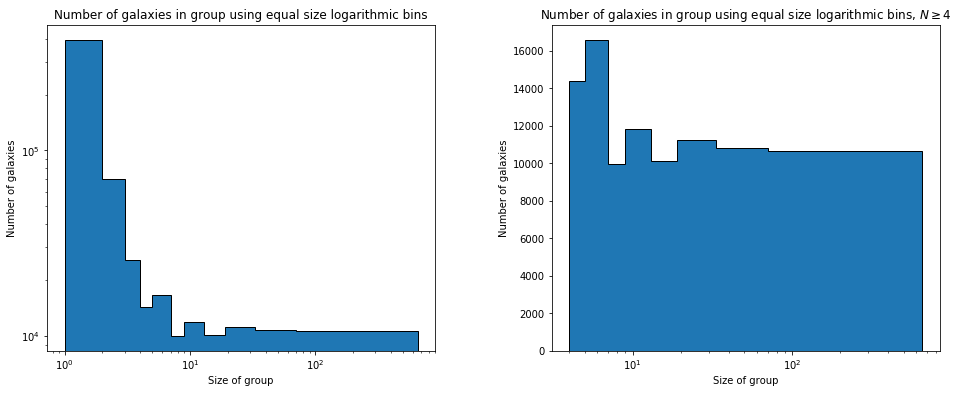

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot histogram of group size for galaxies classified as mergers
ax[0].hist(gz1_data["group_size"], bins=equal_log_bins_with_small, edgecolor="black", histtype="stepfilled")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of galaxies")
ax[0].set_title("Number of galaxies in group using equal size logarithmic bins")

# Plot scatter plot of number of merger votes against group size, for galaxies classified as mergers
ax[1].hist(gz1_data["group_size"], bins=equal_log_bins, edgecolor="black", histtype="stepfilled")
ax[1].set_xscale("log")
# ax[1].set_yscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Number of galaxies")
ax[1].set_title("Number of galaxies in group using equal size logarithmic bins, $N \geq 4$")

fig.subplots_adjust(wspace=0.3)

plt.show()

As expected, the small group sizes $N \leq 3$ have a much greater number of galaxies in their bins than the rest. Exluding these galaxies, the second plot shows that the bins we calculated do indeed have roughly an equal number of galaxies in each bin. The smaller group sizes $4 \leq N \leq 13$ have a much greater variance in the number of galaxies in each group, but this is to be expected due to the discreteness of group size as described earlier.

#### Binned merger fraction
Now that we have our bins, we will again plot of graph of merger fraction against group size.

,Start of group size bin,Merger Fraction,Galaxies in bin
0,1.0,0.010712,394985
1,2.0,0.037433,70365
2,3.0,0.033602,25653
3,4.0,0.028641,14385
4,5.0,0.026524,16551
5,7.0,0.021338,9982
6,9.0,0.019853,11837
7,13.0,0.017105,10114
8,19.0,0.016741,11230
9,33.0,0.014600,10822


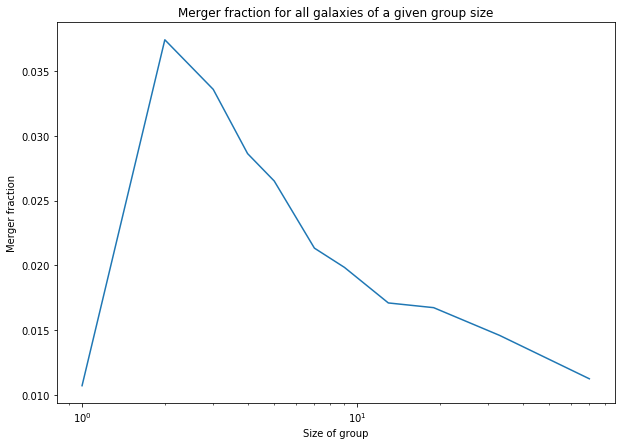

In [25]:
# Define a function that given some data, will return the merger fraction against redshift
def merger_fraction_binning(data, group_size_bins):
    """Takes data, picks out mergers, returns an array of merger fraction against 
    group size and the centres of each redshift bin for plotting"""
    
    # Bin data by group size, with the bin sizes specified
    allbinned, bin_edges = np.histogram(data["group_size"], bins=group_size_bins)
    mergersbinned, bin_edges = np.histogram(data[data["merger_yes"] == 1]["group_size"], bins=group_size_bins)
    
    # Calculate the centre of the bins for plotting data
#     for i in range(len(bin_edges) - 1):
#         bin_centres[i] = (bin_edges[i] + bin_edges[i+1]) / 2
    bin_centres = bin_edges[:-1]
    
    allbinned = allbinned.astype(float)
    mergersbinned = mergersbinned.astype(float)
    
    # Find merger fraction
    merger_fraction_group = mergersbinned / allbinned
    
    return merger_fraction_group, bin_centres, allbinned.astype(int)

merger_fraction_groups, group_size_bin_centres, galaxies_in_bin = merger_fraction_binning(gz1_data, equal_log_bins_with_small)

merger_fraction_groups_info = list(zip(group_size_bin_centres, merger_fraction_groups, galaxies_in_bin))
display(pd.DataFrame(merger_fraction_groups_info, columns=["Start of group size bin", "Merger Fraction", "Galaxies in bin"]))

# Plot a scatter plot of group completeness for all groups in GZ2
plt.figure(figsize=(10,7))
plt.plot(group_size_bin_centres, merger_fraction_groups)
plt.xscale("log")
plt.xlabel("Size of group")
plt.ylabel("Merger fraction")
plt.title("Merger fraction for all galaxies of a given group size")
plt.show()

The plot of merger fraction starts at its lowest value of $\sim 0.011$ for the bin $N=1$, rising to a peak of $\sim 0.037$ at a group size of $N=2$. The group size then falls as it further increases to $\sim 0.011$ for the bin $70 \leq N \leq 652$.

This graph supports our hypothesis that for larger group sizes the merger fraction will decrease.

Bins without small groups: [  4   5   7  10  16  29  61 652]
Bins with small groups: [  1   2   3   4   5   7  10  16  29  61 652]


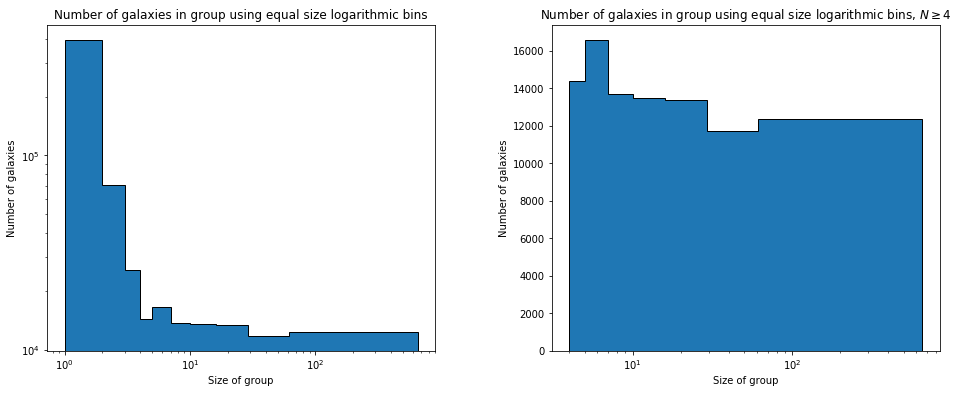

,Start of group size bin,Merger Fraction,Galaxies in bin
0,1.0,0.010712,394985
1,2.0,0.037433,70365
2,3.0,0.033602,25653
3,4.0,0.028641,14385
4,5.0,0.026524,16551
5,7.0,0.021452,13705
6,10.0,0.018609,13488
7,16.0,0.016929,13350
8,29.0,0.014495,11728
9,61.0,0.011789,12384


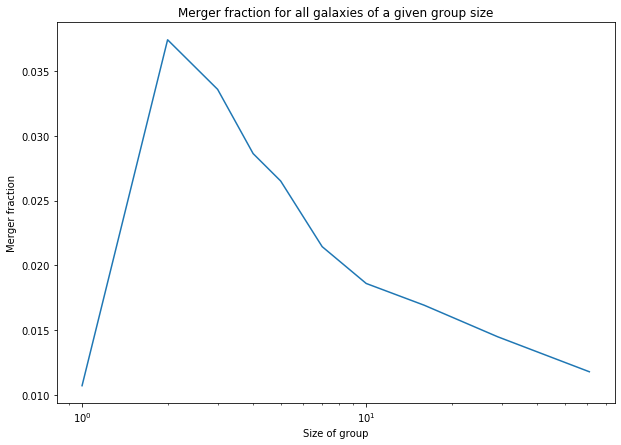

In [33]:
# Create logarithmic bins of equal size without small groups
equal_log_bins_2 = pd.qcut(x=np.log10(gz1_data[gz1_data["group_size"] > 3]["group_size"]), q=8, labels=False, retbins=True, duplicates="drop")[1]
equal_log_bins_2 = np.power(10, equal_log_bins_2)
equal_log_bins_2 = np.round(equal_log_bins_2, 0)

# Add small groups back into new bins
equal_log_bins_with_small_2 = np.insert(equal_log_bins_2, [0], 1)
equal_log_bins_with_small_2 = np.insert(equal_log_bins_with_small_2, [1], 2)
equal_log_bins_with_small_2 = np.insert(equal_log_bins_with_small_2, [2], 3)

# Print the bins that have been calculated
print("Bins without small groups: " + str(equal_log_bins_2.astype(int)))
print("Bins with small groups: " + str(equal_log_bins_with_small_2.astype(int)))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot histogram of group size for galaxies classified as mergers
ax[0].hist(gz1_data["group_size"], bins=equal_log_bins_with_small_2, edgecolor="black", histtype="stepfilled")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of galaxies")
ax[0].set_title("Number of galaxies in group using equal size logarithmic bins")

# Plot scatter plot of number of merger votes against group size, for galaxies classified as mergers
ax[1].hist(gz1_data["group_size"], bins=equal_log_bins_2, edgecolor="black", histtype="stepfilled")
ax[1].set_xscale("log")
# ax[1].set_yscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Number of galaxies")
ax[1].set_title("Number of galaxies in group using equal size logarithmic bins, $N \geq 4$")

fig.subplots_adjust(wspace=0.3)

plt.show()

# Define a function that given some data, will return the merger fraction against redshift
def merger_fraction_binning(data, group_size_bins):
    """Takes data, picks out mergers, returns an array of merger fraction against 
    group size and the centres of each redshift bin for plotting"""
    
    # Bin data by group size, with the bin sizes specified
    allbinned, bin_edges = np.histogram(data["group_size"], bins=group_size_bins)
    mergersbinned, bin_edges = np.histogram(data[data["merger_yes"] == 1]["group_size"], bins=group_size_bins)
    
    # Calculate the centre of the bins for plotting data
#     for i in range(len(bin_edges) - 1):
#         bin_centres[i] = (bin_edges[i] + bin_edges[i+1]) / 2
    bin_centres = bin_edges[:-1]
    
    allbinned = allbinned.astype(float)
    mergersbinned = mergersbinned.astype(float)
    
    # Find merger fraction
    merger_fraction_group = mergersbinned / allbinned
    
    return merger_fraction_group, bin_centres, allbinned.astype(int)

merger_fraction_groups_2, group_size_bin_centres_2, galaxies_in_bin_2 = merger_fraction_binning(gz1_data, equal_log_bins_with_small_2)

merger_fraction_groups_info_2 = list(zip(group_size_bin_centres_2, merger_fraction_groups_2, galaxies_in_bin_2))
display(pd.DataFrame(merger_fraction_groups_info_2, columns=["Start of group size bin", "Merger Fraction", "Galaxies in bin"]))

# Plot a scatter plot of group completeness for all groups in GZ2
plt.figure(figsize=(10,7))
plt.plot(group_size_bin_centres_2, merger_fraction_groups_2)
plt.xscale("log")
plt.xlabel("Size of group")
plt.ylabel("Merger fraction")
plt.title("Merger fraction for all galaxies of a given group size")
plt.show()